<a href="https://colab.research.google.com/github/Akhilesh-Kumar-S/Handwritten-Digit-Classifier/blob/main/Handwritten_Digit_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784' , parser = 'auto')
type(mnist)

sklearn.utils._bunch.Bunch

In [ ]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
X , y = mnist['data'] , mnist['target']

In [ ]:
X.shape

(70000, 784)

In [ ]:
y.shape

(70000,)

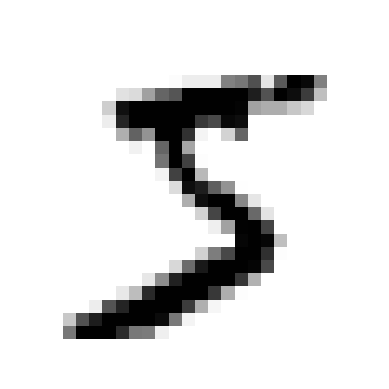

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

some_digit = np.array(X.iloc[0])
some_digit_image = some_digit.reshape(28 , 28)
plt.imshow(some_digit_image , cmap = 'binary')
plt.axis('off')
plt.show()

In [ ]:
y[0]

'5'

In [ ]:
y = y.astype(np.uint8)

In [ ]:
X_train , y_train , X_test , y_test = X[:60000] , y[:60000] , X[60000:] , y[60000:]

In [ ]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train , y_train_5)
sgd_clf.predict([some_digit])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([False])

In [ ]:
list = [1,2,3,4,5]
print([list])

[[1, 2, 3, 4, 5]]


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits = 3 , random_state = 42 , shuffle = True)
for train_index , test_index in skfolds.split(X_train , y_train_5):
  clone_clf = clone(sgd_clf)
  X_train_folds = X_train.iloc[train_index]
  X_test_fold = X_train.iloc[test_index]
  y_train_folds = y_train_5.iloc[train_index]
  y_test_fold = y_train_5.iloc[test_index]

  clone_clf.fit(X_train_folds , y_train_folds)
  prediction = clone_clf.predict(X_test_fold)
  n_correct = sum(prediction == y_test_fold)
  print(n_correct/len(y_test_fold))

0.9669
0.91625
0.96785


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(sgd_clf , X_train , y_train_5 ,
                 cv = 3 , scoring = 'accuracy' , verbose = 3)

scores

[CV] END ................................ score: (test=0.950) total time=  13.0s
[CV] END ................................ score: (test=0.960) total time=  12.1s
[CV] END ................................ score: (test=0.960) total time=   9.4s


array([0.95035, 0.96035, 0.9604 ])

In [ ]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf , X_train , y_train_5 , cv = 3)

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_train_5 , y_train_pred)
conf_matrix

array([[53892,   687],
       [ 1891,  3530]])

In [ ]:
from sklearn.metrics import precision_score
precision = precision_score(y_train_5 , y_train_pred)
precision

0.8370879772350012

In [ ]:
from sklearn.metrics import recall_score
recall = recall_score(y_train_5 , y_train_pred)
recall

0.6511713705958311

In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(y_train_5 , y_train_pred)
f1

0.7325171197343846

In [ ]:
y_score = sgd_clf.decision_function([some_digit])
y_score

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([2164.22030239])

In [ ]:
threshold = 0
y_some_digit_pred = (y_score > threshold)
y_some_digit_pred

array([ True])

In [ ]:
threshold = 8000
y_some_digit_pred = (y_score > threshold)
y_some_digit_pred

array([False])

In [ ]:
y_scores = cross_val_predict(sgd_clf , X_train , y_train_5 , cv = 3 ,
                             method = 'decision_function')

In [ ]:
from sklearn.metrics import precision_recall_curve
precision , recall , threshold = precision_recall_curve(y_train_5 , y_scores)

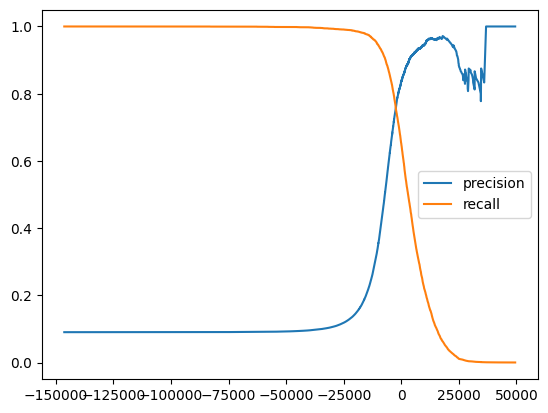

In [ ]:
import matplotlib.pyplot as plt
def plot_precision_recall_vs_threshold(precision , recall , threshold):
  plt.plot(threshold , precision[:-1] , label = 'precision')
  plt.plot(threshold , recall[:-1] , label = 'recall')
plot_precision_recall_vs_threshold(precision , recall , threshold)
plt.legend()
plt.show()

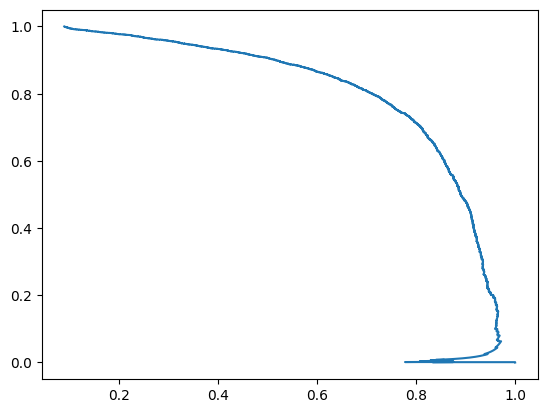

In [ ]:
%matplotlib inline
plt.plot(precision , recall)
plt.show()

In [ ]:
threshold_90_precision = threshold[np.argmax(precision >= 0.90)]

In [ ]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [ ]:
precision_score(y_train_5 , y_train_pred_90)

0.9000345901072293

In [ ]:
recall_score(y_train_5 , y_train_pred_90)

0.4799852425751706

In [ ]:
from sklearn.metrics import roc_curve
fpr , tpr , threshold = roc_curve(y_train_5 , y_scores)

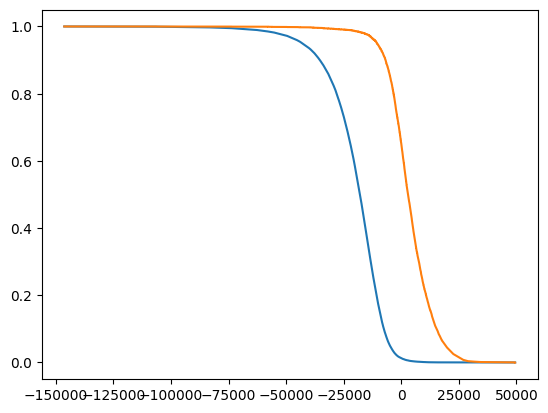

In [ ]:
def plot_fpr_tpr_vs_threshold(fpr , tpr):
  plt.plot(threshold , fpr)
  plt.plot(threshold , tpr)

plot_fpr_tpr_vs_threshold(fpr , tpr)
plt.show()

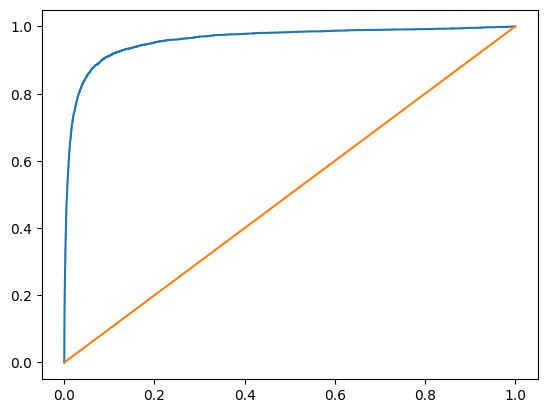

In [ ]:
def plot_roc_curve(fpr , tpr , label = None):
  plt.plot(fpr,tpr , label = label)
  plt.plot([0,1] , [0,1])
plot_roc_curve(fpr , tpr)
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5 , y_scores)

0.9604938554008616

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(random_state = 42)
rnd_clf.fit(X_train , y_train_5)
rnd_clf.predict_proba([some_digit])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([[0.02, 0.98]])

In [ ]:
y_probas_forest = cross_val_predict(rnd_clf , X_train , y_train_5 , cv = 3 ,
                                    method = 'predict_proba' , verbose = 3)

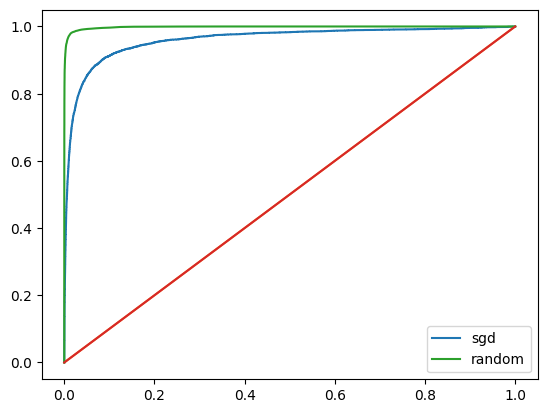

In [ ]:
y_score_forest = y_probas_forest[: , 1]
fpr_forest , tpr_forest , threshold_forest = roc_curve(y_train_5 , y_score_forest)
plot_roc_curve(fpr , tpr , label = 'sgd')
plot_roc_curve(fpr_forest , tpr_forest , label = 'random')
plt.legend()
plt.show()

In [ ]:
roc_auc_score(y_train_5 , y_score_forest)

0.9983436731328145

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train , y_train)
svc.predict([some_digit])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

In [ ]:
some_digit_scores = svc.decision_function([some_digit])
some_digit_scores

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [ ]:
print(svc.classes_)

[0 1 2 3 4 5 6 7 8 9]


In [ ]:
from sklearn.multiclass import OneVsRestClassifier
svm_clf = OneVsRestClassifier(SVC())
svm_clf.fit(X_train , y_train)
svm_clf.predict([some_digit])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

array([5], dtype=uint8)

In [ ]:
svm_clf.estimators_

[SVC(), SVC(), SVC(), SVC(), SVC(), SVC(), SVC(), SVC(), SVC(), SVC()]

In [ ]:
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train , y_train)
sgd_clf.predict([some_digit])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([3], dtype=uint8)

In [ ]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
sgd_clf.decision_function([some_digit])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [ ]:
cross_val_score(sgd_clf , X_train , y_train , cv = 3 , scoring = 'accuracy')

array([0.87365, 0.85835, 0.8689 ])

In [ ]:
y_train_pred = cross_val_predict(sgd_clf , X_train , y_train , cv = 3)

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf , X_train_scaled , y_train , cv = 3 , scoring = 'accuracy')

array([0.8983, 0.891 , 0.9018])

# Multilabel Classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large , y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train , y_multilabel)

KNeighborsClassifier()

In [ ]:
knn_clf.predict([some_digit])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[False,  True]])

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score

y_train_knn_pred = cross_val_predict(knn_clf , X_train , y_multilabel , cv = 3)

In [ ]:
from sklearn.metrics import f1_score , precision_score , recall_score , confusion_matrix

In [ ]:
f1_score(y_multilabel , y_train_knn_pred , average = 'macro')

0.976410265560605

In [ ]:
f1_score(y_multilabel , y_train_knn_pred , average = 'weighted')


0.9778357403921755

In [ ]:
precision_score(y_multilabel, y_train_knn_pred , average = 'macro')

0.9744001577165913

In [ ]:
recall_score(y_multilabel , y_train_knn_pred , average = 'macro')

0.9785042366458462

# Multioutput Classification

In [ ]:
noise = np.random.randint(0 , 100 , (len(X_train) , 784))
X_train_mod = X_train + noise
noise = np.random.randint(0 , 100 , (len(X_test) , 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

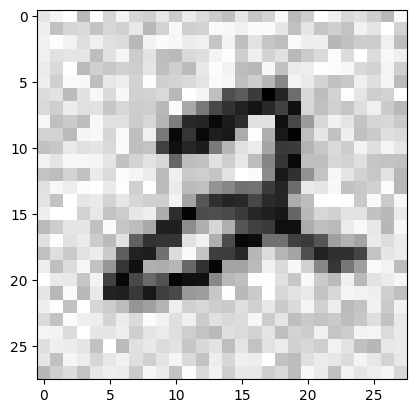

In [ ]:
some_digit = np.array(X_train_mod.iloc[5])
some_digit_image = some_digit.reshape(28 , 28)
plt.imshow(some_digit_image , cmap = 'binary')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod , y_train_mod)

KNeighborsClassifier()

In [ ]:
clear_digit = knn_clf.predict([some_digit])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


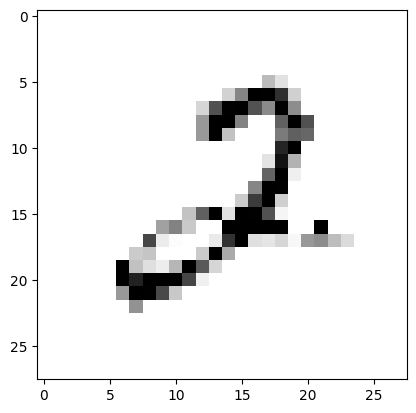

In [ ]:
clear_image = clear_digit.reshape(28 , 28)
plt.imshow(clear_image , cmap = 'binary')
plt.show()